In [3]:
import sys
sys.path.append('../') 
import LoadIntoDf

df = LoadIntoDf.load_sqlite_data()
# Display the DataFrame
df.head()


,p1447,p1073,p1448,p1074,p1449,p1075,p1450,p1076,p1451,p1077,...,p4838,p4839,p4840,p4841,p4842,p4843,p4844,p4845,angle,difficulty
uuid,,,,,,,,,,,,,,,,,,,,,
00007DA715CE4E7DBF60928D240CE7F2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,6b/V4
00007DA715CE4E7DBF60928D240CE7F2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,50,6a/V3
0004ff002424476b8e64256dbe0aed1f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,6a/V3
00079a6f946b4c26ba25123f77f41ea8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,4c/V0
00079a6f946b4c26ba25123f77f41ea8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,60,7b/V8


In [2]:
df.describe()

,p1447,p1073,p1448,p1074,p1449,p1075,p1450,p1076,p1451,p1077,...,p4837,p4838,p4839,p4840,p4841,p4842,p4843,p4844,p4845,angle
count,173801.000000,173801.000000,173801.000000,173801.000000,173801.000000,173801.000000,173801.000000,173801.000000,173801.000000,173801.000000,...,173801.000000,173801.000000,173801.000000,173801.000000,173801.000000,173801.000000,173801.0,173801.000000,173801.000000,173801.000000
mean,0.048153,0.015570,0.011807,0.007963,0.026162,0.008849,0.036363,0.018751,0.042508,0.015380,...,0.000115,0.000184,0.000288,0.000104,0.000017,0.000035,0.0,0.000006,0.000023,36.389290
std,0.214090,0.123803,0.108015,0.088881,0.159618,0.093653,0.187193,0.135646,0.201747,0.123058,...,0.010727,0.013568,0.016959,0.010176,0.004155,0.005875,0.0,0.002399,0.004797,12.527126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,30.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,40.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,45.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,70.000000


In [4]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

X = csr_matrix(df.drop('difficulty', axis=1).values)
y = df.difficulty.str.split('/').str[0]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=2000, n_jobs=16, solver='saga', verbose=1)  
logistic_model.fit(X_train, y_train)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.35666419
Epoch 3, change: 0.17412764
Epoch 4, change: 0.11380777
Epoch 5, change: 0.08500410
Epoch 6, change: 0.06422371
Epoch 7, change: 0.05286859
Epoch 8, change: 0.04689950
Epoch 9, change: 0.04202234
Epoch 10, change: 0.03816380
Epoch 11, change: 0.03496778
Epoch 12, change: 0.03229262
Epoch 13, change: 0.03016096
Epoch 14, change: 0.02846975
Epoch 15, change: 0.02693542
Epoch 16, change: 0.02557226
Epoch 17, change: 0.02434308
Epoch 18, change: 0.02310808
Epoch 19, change: 0.02202804
Epoch 20, change: 0.02099356
Epoch 21, change: 0.02008969
Epoch 22, change: 0.01925975
Epoch 23, change: 0.01848433
Epoch 24, change: 0.01779241
Epoch 25, change: 0.01710254
Epoch 26, change: 0.01650650
Epoch 27, change: 0.01594855
Epoch 28, change: 0.01540701
Epoch 29, change: 0.01490939
Epoch 30, change: 0.01445153
Epoch 31, change: 0.01400922
Epoch 32, change: 0.01358811
Epoch 33, change: 0.01321005
Epoch 34, change: 0.01283423
Epoch 35, change: 0.012

LogisticRegression(max_iter=2000, n_jobs=16, solver='saga', verbose=1)

In [7]:
accuracy = logistic_model.score(X_test, y_test)
print("Accuracy:", accuracy)

y_pred = logistic_model.predict(X_test)

Accuracy: 0.1905008486522252


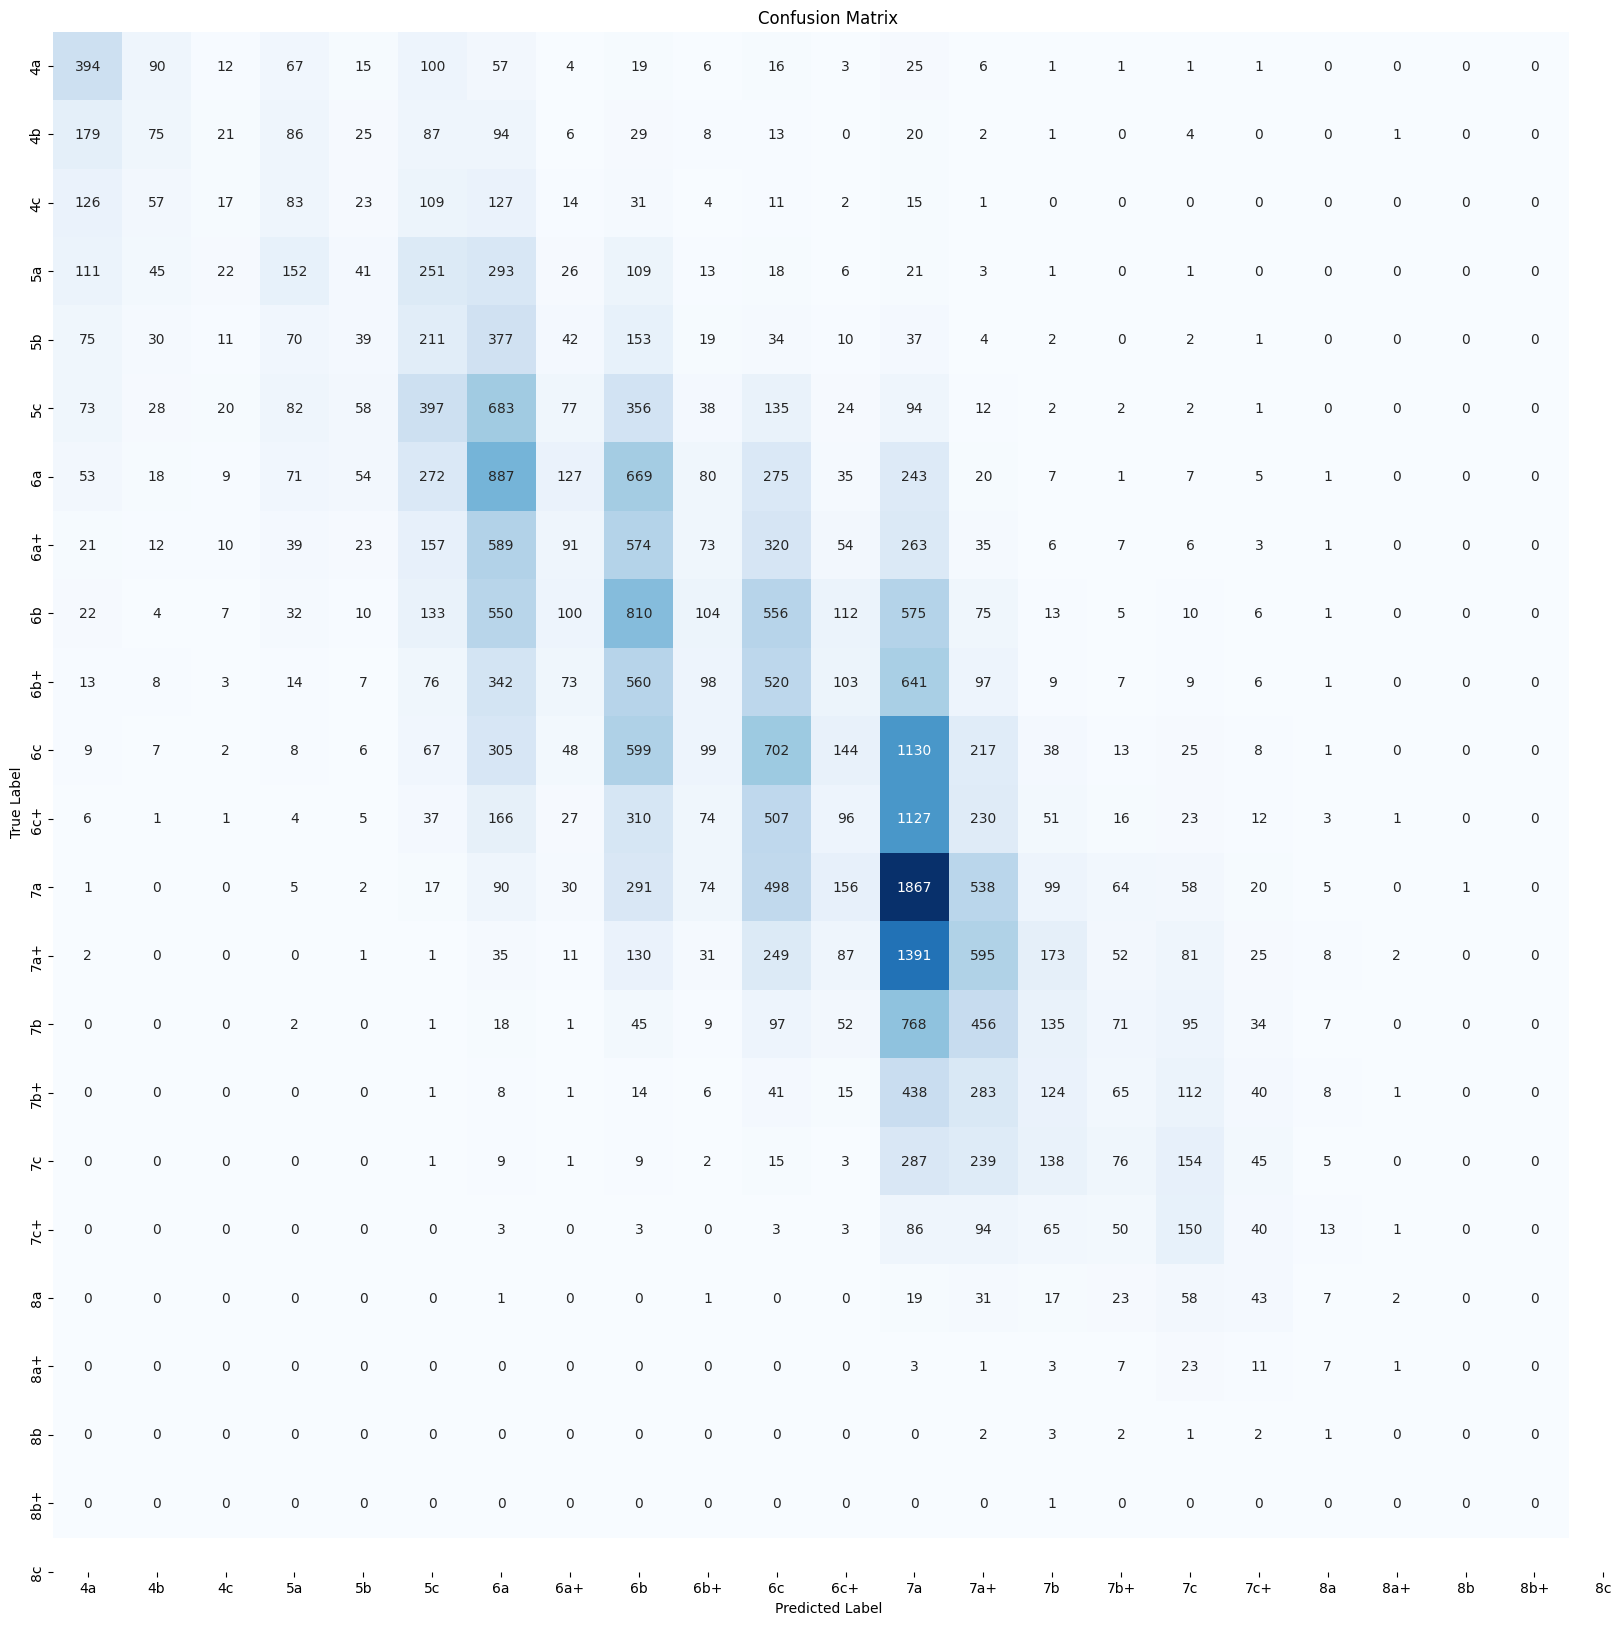

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = logistic_model.classes_

# Plot confusion matrix
plt.figure(figsize=(20, 20))  # Adjust the size here

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels,
            cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.pdf', bbox_inches='tight')
plt.show()


In [9]:
y2_test = y_test.str.replace('+', '')
y2_train = y_train.str.replace('+', '')

In [10]:
from sklearn.linear_model import LogisticRegression

logistic_model2 = LogisticRegression(max_iter=2000, n_jobs=16, solver='saga', verbose=1)  
logistic_model2.fit(X_train, y2_train)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.28058698
Epoch 3, change: 0.15471275
Epoch 4, change: 0.11098226
Epoch 5, change: 0.08869866
Epoch 6, change: 0.07363227
Epoch 7, change: 0.06292659
Epoch 8, change: 0.05523382
Epoch 9, change: 0.04882707
Epoch 10, change: 0.04376286
Epoch 11, change: 0.03984090
Epoch 12, change: 0.03627591
Epoch 13, change: 0.03291044
Epoch 14, change: 0.03005736
Epoch 15, change: 0.02767873
Epoch 16, change: 0.02560129
Epoch 17, change: 0.02367162
Epoch 18, change: 0.02210230
Epoch 19, change: 0.02062904
Epoch 20, change: 0.01927825
Epoch 21, change: 0.01813633
Epoch 22, change: 0.01710457
Epoch 23, change: 0.01611501
Epoch 24, change: 0.01527823
Epoch 25, change: 0.01447889
Epoch 26, change: 0.01372967
Epoch 27, change: 0.01304313
Epoch 28, change: 0.01244237
Epoch 29, change: 0.01186415
Epoch 30, change: 0.01133036
Epoch 31, change: 0.01082570
Epoch 32, change: 0.01038132
Epoch 33, change: 0.00994965
Epoch 34, change: 0.00953579
Epoch 35, change: 0.009

LogisticRegression(max_iter=2000, n_jobs=16, solver='saga', verbose=1)

Accuracy: 0.32510572192974885


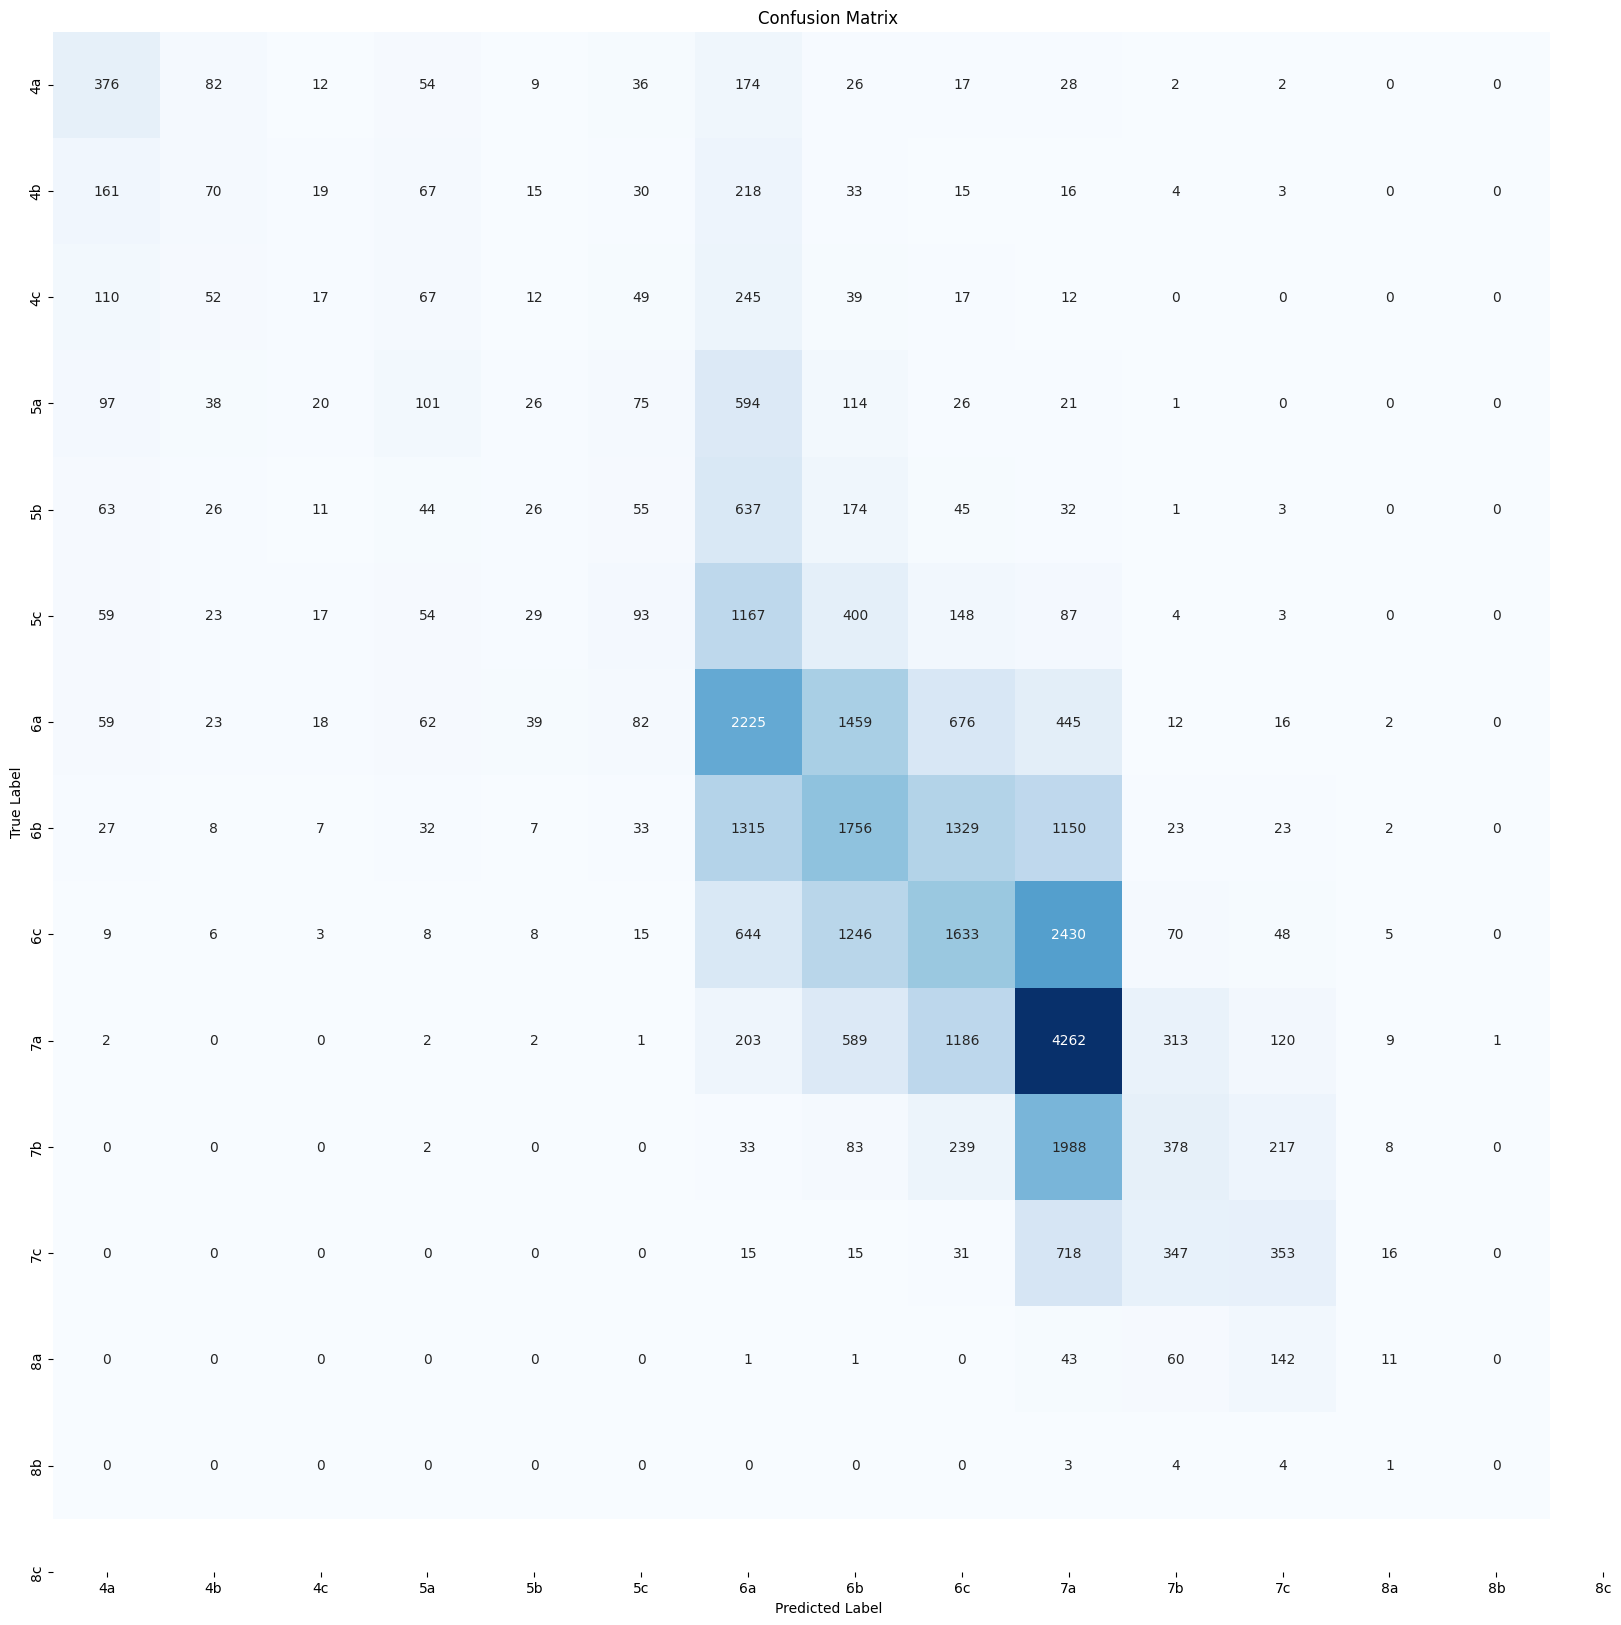

In [17]:

y2_pred = logistic_model2.predict(X_test)
accuracy = logistic_model2.score(X_test, y2_test)
print("Accuracy:", accuracy)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y2_test, y2_pred)
class_labels = logistic_model2.classes_

# Plot confusion matrix
plt.figure(figsize=(20, 20))  # Adjust the size here

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels,
            cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix2.pdf', bbox_inches='tight')
plt.show()
